In [1]:
# Enable automatic reloading of modules
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

# Add the project root (1 level up from 'notebooks/') to Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)


In [3]:
import json
from agents.chat_agent import init_chat_agent, ask_chat_agent
from tools.game_tools import available_tools, guess, hint
from game.leword_game import LeWordGame
from vision.render_board import render_leword_board

# Create your game instance
the_word = "subaru"  # Example word
the_hint = "Japanese car brand."  # Example hint
game = LeWordGame(the_word, the_hint, 10)

# Initialize chat messages and function descriptors
messages = init_chat_agent(game)
functions = available_tools()

def run_turn(messages, functions, game):
    response = ask_chat_agent(messages, functions)
    chat_message = response.choices[0].message

    print("Assistant message full:")
    print(json.dumps(chat_message.to_dict(), indent=2))

    messages.append(chat_message)
    game_over = False

    if chat_message.function_call:
        function_name = chat_message.function_call.name
        arguments = json.loads(chat_message.function_call.arguments)

        tool_functions = {
            "guess": guess,
            "hint": hint,
        }

        if function_name in tool_functions:
            print(f"Calling tool: {function_name} with arguments: {arguments}")
            tool_response = tool_functions[function_name](**arguments, game=game)
        else:
            tool_response = {"feedback": f"Unknown tool: {function_name}", "correct": False}
            print(tool_response["feedback"])

        # Check if the guess was correct
        game_over = tool_response.get("correct", False)

        messages.append({
            "role": "function",
            "name": function_name,
            "content": json.dumps(tool_response)
        })

        # inside run_turn, after game.attempts is updated
        img = render_leword_board([list(result.feedback) for result in game.attempts], len(the_word))
        img.show()  # Or save, or pass to model


    state_summary = f"Current guesses: {game.state()}, Attempts left: {game.max_attempts - len(game.attempts)}"
    messages.append({
        "role": "system",
        "content": state_summary
    })

    return messages, game_over

# Example usage for several turns:
num_turns = 10
for i in range(num_turns):
    print(f"\n--- Turn {i+1} ---")
    messages, game_over = run_turn(messages, functions, game)
    if game_over:
        print("🎉 Correct word guessed! Game over.")
        break
else:
    print("❌ Max attempts reached. Game over.")




--- Turn 1 ---
Messages sent to OpenAI API:
{'role': 'system', 'content': '\n                Instructions:\n                \n            Let\'s play a word-guessing game called LeWord!\n            I will give you a hint, and you have to guess the secret word.\n\n            IMPORTANT:\n            - You must guess words that are EXACTLY 6 letters long.\n            - Any guess shorter or longer than 6 letters will be rejected, and you will lose an attempt.\n            - Do NOT guess any invalid-length word, even once.\n\n            Example valid guess: "plato" (5 letters)\n            Example invalid guess: "caesar" (6 letters)\n\n            You have 10 attempts to guess the correct word.\n            The word length is 6 characters.\n\n            After each guess, you will receive feedback using a string of 6 characters:\n            - An uppercase letter means that letter is correct and in the correct position.\n            - A lowercase letter means that letter is in the word

/home/magnus/private/le-word/vision/render_board.py:28: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


Assistant message full:
{
  "content": "Oops, it seems \"mazda\" was not a valid guess as it does not have 6 letters, losing an attempt for it. Let's try a different 6-letter guess related to a Japanese car brand. Keep the hint in mind and try again!",
  "refusal": null,
  "role": "assistant",
  "annotations": []
}

--- Turn 6 ---
Messages sent to OpenAI API:
{'role': 'system', 'content': '\n                Instructions:\n                \n            Let\'s play a word-guessing game called LeWord!\n            I will give you a hint, and you have to guess the secret word.\n\n            IMPORTANT:\n            - You must guess words that are EXACTLY 6 letters long.\n            - Any guess shorter or longer than 6 letters will be rejected, and you will lose an attempt.\n            - Do NOT guess any invalid-length word, even once.\n\n            Example valid guess: "plato" (5 letters)\n            Example invalid guess: "caesar" (6 letters)\n\n            You have 10 attempts to gue

/home/magnus/private/le-word/vision/render_board.py:28: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


Assistant message full:
{
  "content": "Your guess \"nissan\" gave the feedback \"??s?a?\", meaning:\n\n- '?' - The first, second, and last letters are not in the word.\n- 's' - The third letter 's' is in the word but not in that position.\n- 'a' - The fifth letter 'a' is in the correct position.\n\nLet's use this information to make another guess. Remember, it's a 6-letter Japanese car brand!",
  "refusal": null,
  "role": "assistant",
  "annotations": []
}

--- Turn 8 ---
Messages sent to OpenAI API:
{'role': 'system', 'content': '\n                Instructions:\n                \n            Let\'s play a word-guessing game called LeWord!\n            I will give you a hint, and you have to guess the secret word.\n\n            IMPORTANT:\n            - You must guess words that are EXACTLY 6 letters long.\n            - Any guess shorter or longer than 6 letters will be rejected, and you will lose an attempt.\n            - Do NOT guess any invalid-length word, even once.\n\n      

/home/magnus/private/le-word/vision/render_board.py:28: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()



--- Turn 1 ---
Messages sent to OpenAI API:
{'role': 'system', 'content': '\n                Instructions:\n                \n            Let\'s play a word-guessing game called LeWord!\n            I will give you a hint, and you have to guess the secret word.\n\n            IMPORTANT:\n            - You must guess words that are EXACTLY 6 letters long.\n            - Any guess shorter or longer than 6 letters will be rejected, and you will lose an attempt.\n            - Do NOT guess any invalid-length word, even once.\n\n            Example valid guess: "plato" (5 letters)\n            Example invalid guess: "caesar" (6 letters)\n\n            You have 10 attempts to guess the correct word.\n            The word length is 6 characters.\n\n            After each guess, you will receive feedback using a string of 6 characters:\n            - An uppercase letter means that letter is correct and in the correct position.\n            - A lowercase letter means that letter is in the word

/home/magnus/private/le-word/vision/render_board.py:28: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


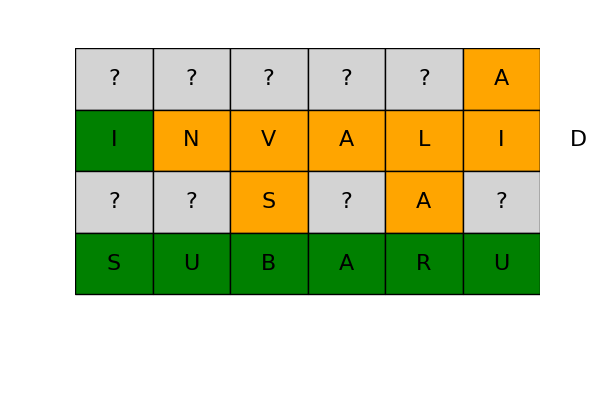

In [4]:
from IPython.display import display, Image
import base64
from tools.game_tools import show_board_image

num_turns = 10
for i in range(num_turns):
    print(f"\n--- Turn {i+1} ---")
    messages, game_over = run_turn(messages, functions, game)
    if game_over:
        print("🎉 Correct word guessed! Game over.")
        break
else:
    print("❌ Max attempts reached. Game over.")

# Efter loopen: visa spelbrädet en gång
board_info = show_board_image(game)
img_data = base64.b64decode(board_info["image_base64"])
display(Image(data=img_data))
